# Amazon Reviews for SA fine-grained 5 clases CSV


In [68]:
import seaborn as sb
import matplotlib.pyplot as plt

import pandas as pd
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

#from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to C:\Users\Margarida
[nltk_data]     Viera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Margarida
[nltk_data]     Viera\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Margarida
[nltk_data]     Viera\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Dataset


In [69]:
train_df = pd.read_csv('../docs/train.csv')
test_df = pd.read_csv('../docs/train.csv')


In [70]:
# Shorten the number of samples from every class_index type (n = 200000)

classes = []
n_samples = 100

for i in range(1, 6):
    classes.append(train_df.query(f'class_index == {i}').sample(n=n_samples))

train_df_s = pd.concat(classes)
train_df_s.reset_index(drop=True, inplace=True)

## Exploratory analysis


In [71]:
# checking for presence of null values that might interfere with data processing
train_df_s.isna().sum()


class_index     0
review_title    0
review_text     0
dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

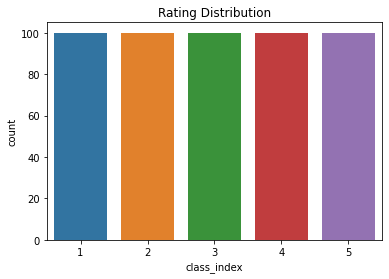

In [72]:
sb.countplot(x='class_index', data=train_df_s)
plt.title('Rating Distribution')


## Preprocess data


In [73]:
def tokezine(string):
    return string.lower().split()


def stem(stemmer, words, stop_words):
    return [stemmer.stem(word) for word in words if word not in stop_words]


def lemmatize(lemmatizer, words):
    return [lemmatizer.lemmatize(word) for word in words]


In [74]:
train_df_s['review_full'] = train_df_s['review_title']

stop_words = set(nltk.corpus.stopwords.words('english'))

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [77]:
# traversing all dataframe's rows
for i in range(train_df_s.shape[0]):

    # process review's title
    title = re.sub("[^a-zA-Z]", " ", train_df_s['review_title'][i])
    title_tokens = tokezine(title)
    title_stems = stem(stemmer, title_tokens, stop_words)
    title_lemmas = lemmatize(lemmatizer, title_stems)
    title_final = ' '.join(title_lemmas)
    train_df_s['review_title'][i] = title_final

    # process review's text
    text = re.sub("[^a-zA-Z]", " ", train_df_s['review_text'][i])
    text_tokens = tokezine(text)
    text_stems = stem(stemmer, text_tokens, stop_words)
    text_lemmas = lemmatize(lemmatizer, text_stems)
    text_final = ' '.join(text_lemmas)
    train_df_s['review_text'][i] = text_final

    train_df_s['review_full'][i] = f'{title_final} {text_final}'
  

C:\Users\Margarida Viera\AppData\Local\Temp\ipykernel_8372\3803203982.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_s['review_title'][i] = title_final
C:\Users\Margarida Viera\AppData\Local\Temp\ipykernel_8372\3803203982.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_s['review_text'][i] = text_final
C:\Users\Margarida Viera\AppData\Local\Temp\ipykernel_8372\3803203982.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [78]:
train_df_s

,class_index,review_title,review_text,review_full
0,1,durabl,band last backlight remain stem alway spring b...,durabl band last backlight remain stem alway s...
1,1,full distort,one thing great u write anyth call book someon...,full distort one thing great u write anyth cal...
2,1,,order wrong one shipper advertis adapt rd gene...,order wrong one shipper advertis adapt rd gen...
3,1,baaaaaaaaaaaddd,act one main charact shawne bad cheer appear g...,baaaaaaaaaaaddd act one main charact shawne ba...
4,1,aw incoher mess film,terribl blaxploit featur virtual incoher last ...,aw incoher mess film terribl blaxploit featur ...
...,...,...,...,...
495,5,excel pedal,instal rode first time excel use spd mountain ...,excel pedal instal rode first time excel use s...
496,5,game awesom,recommend game truli best thing blizzard relea...,game awesom recommend game truli best thing bl...
497,5,plug,plug find mine want play pokemon red sp look e...,plug plug find mine want play pokemon red sp l...
498,5,new awar,book brought new awar woman last supper never ...,new awar book brought new awar woman last supp...


## Nabo bais


## Neural Minds


## Tree com Ramos
